In [ ]:
!git clone https://github.com/petroniocandido/pyFTS

In [1]:
# --- Import Common pyFTS Utilities --- #
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import benchmarks as bchmk

from pyFTS.models import pwfts

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

# --- Import Common Packages --- #
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Load Data

In [22]:
df = pd.read_excel('data/unilever.xlsx')

In [24]:
dataset_close = df.Close.values
dataset_close_diff = tdiff.apply(dataset_close)

dataset_close.shape, len(dataset_close_diff)

((168,), 168)

#### Visualization

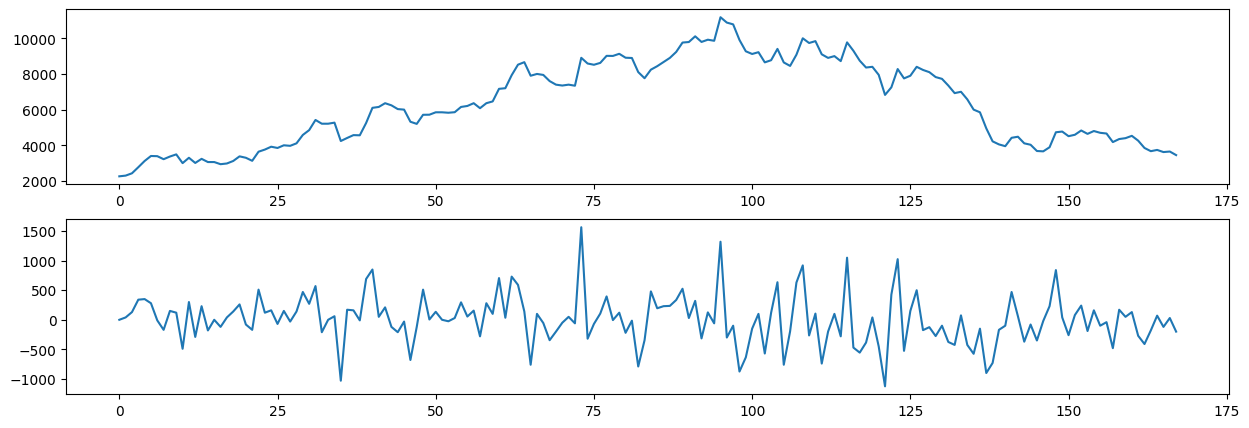

In [25]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,5])
ax[0].plot(dataset_close)
ax[1].plot(dataset_close_diff)

cUtil.show_and_save_image(fig,"taiex",False)

#### Statistics

In [27]:
result = adfuller(dataset_close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.471597
p-value: 0.547512
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


In [28]:
result = adfuller(dataset_close_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.870511
p-value: 0.000000
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
